In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as ply
import seaborn as sns
from sklearn.feature_selection import SelectKBest,f_classif,chi2,f_regression,mutual_info_classif

In [29]:
sns.set(rc={'figure.figsize':(12,8)})

In [30]:
data = pd.read_csv('./Data/Train-All.csv')


In [31]:
#data= data.drop(['PassengerId','Cabin_Codes'],axis=1)

In [32]:
data.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'RESALE', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)',
       'IN_CITY', 'CITY_2', 'SQFT_P_ROOM', 'Lo+Li', 'Rare_House', 'City_Type',
       'Area', 'l*l', 'BHK_CITY', 'BHK_IN_CITY', 'multi'],
      dtype='object')

In [33]:
cat_colms = ['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA','BHK_OR_RK','RESALE','IN_CITY', 'CITY_2','Rare_House', 'City_Type', 'Area','BHK_CITY',
 'BHK_IN_CITY']
num_colms = set(data.columns)-set(cat_colms)
num_colms = list(num_colms)

In [34]:
set(data.columns)-set(cat_colms)

{'BHK_NO.',
 'LATITUDE',
 'LONGITUDE',
 'Lo+Li',
 'SQFT_P_ROOM',
 'SQUARE_FT',
 'TARGET(PRICE_IN_LACS)',
 'l*l',
 'multi'}

# (Numerical Input, Numerical Output)
 A test regression problem is prepared using the make_regression() function.

 Feature selection is performed using Pearson’s Correlation Coefficient via the f_regression() function.

[Text(0, 0.5, 'Corr'), Text(0.5, 0, 'Feature')]

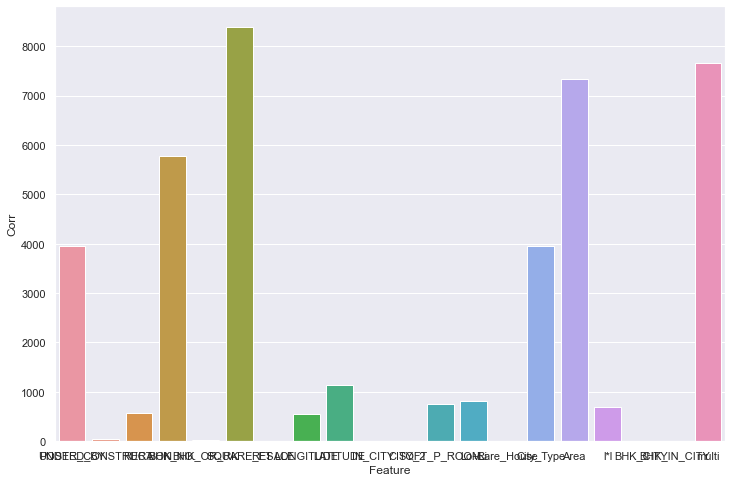

In [43]:
fs = SelectKBest(score_func=f_regression,k=5)
res = fs.fit_transform(X=data.drop('TARGET(PRICE_IN_LACS)',axis=1),y=data['TARGET(PRICE_IN_LACS)'])
fig = sns.barplot(x=data.drop('TARGET(PRICE_IN_LACS)',axis=1).columns,y=fs.scores_ ,) 
fig.set(xlabel='Feature',ylabel='Corr')